In [2]:
import os

import geopandas as gpd
import pandas as pd
import numpy as np
import momepy as mm
import networkx as nx

from sqlalchemy import create_engine

import matplotlib.pyplot as plt

user = os.environ.get('DB_USERNAME')
pwd = os.environ.get('DB_PASSWORD')
host = os.environ.get('DB_HOSTNAME')
port = os.environ.get('DB_PORT')

url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/geodemo"
engine = create_engine(url)

In [82]:
x, y = 338286, 392077  # coordinates in epsg 27700
buffer = 400  # radius in [m]

In [83]:
table = 'openmaplocal'
sql = f'SELECT * FROM {table} WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'

omap = gpd.read_postgis(sql, engine, geom_col='geometry')

In [84]:
table = 'openroads'
sql = f'SELECT * FROM {table} WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'

roads = gpd.read_postgis(sql, engine, geom_col='geometry')

In [89]:
table = 'openuprn'
sql = f'SELECT * FROM {table} WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'

uprn = gpd.read_postgis(sql, engine, geom_col='geometry')

In [90]:
def pgselect(table, buffer=1000, x=338286, y=392077):
    user = os.environ.get('DB_USERNAME')
    pwd = os.environ.get('DB_PASSWORD')
    host = os.environ.get('DB_HOSTNAME')
    port = os.environ.get('DB_PORT')

    url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/geodemo"
    engine = create_engine(url)
    sql = f'SELECT * FROM {table} WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'
    return gpd.read_postgis(sql, engine, geom_col='geometry')

<AxesSubplot:>

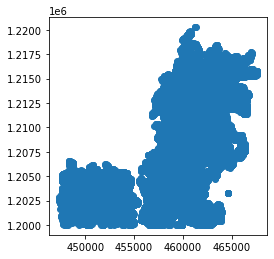

In [99]:
pgselect('opentoid', 1000000).plot()

<AxesSubplot:>

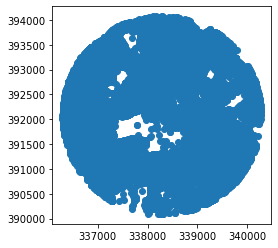

In [61]:
uprn.plot()

In [12]:
roads.roadFunction.unique()

array(['Local Road', 'A Road', 'Minor Road',
       'Restricted Local Access Road', 'Secondary Access Road', 'B Road'],
      dtype=object)

In [18]:
aroads = roads.loc[roads.roadFunction=='A Road']

In [19]:
broads = roads.loc[roads.roadFunction=='B Road']

In [86]:
mapper = dict()
unmap = dict()
for i, rf in enumerate(roads.roadFunction.unique()):
    mapper[rf]=i
    unmap[i] = rf

In [87]:
roads['color'] = roads.roadFunction.apply(lambda x: mapper[x])

In [30]:
motorway = roads.loc[roads.roadFunction == 'Motorway']

In [33]:
local = roads.loc[roads.roadFunction == 'Local Road']

In [52]:
df = roads[['roadFunction','color']]

In [54]:
df = df.loc[~df.duplicated()]

In [55]:
df

,roadFunction,color
0,Local Road,0
1,A Road,1
66,Minor Road,2
76,Secondary Access Road,3
125,Restricted Local Access Road,4
398,Local Access Road,5
617,B Road,6


In [81]:
uprn.UPRN

0         38020591
1         38020592
2         38020593
3         38020594
4         38020595
          ...     
600       38339410
601       38339411
602       38339412
603       38339413
604    10024831255
Name: UPRN, Length: 605, dtype: int64

<AxesSubplot:>

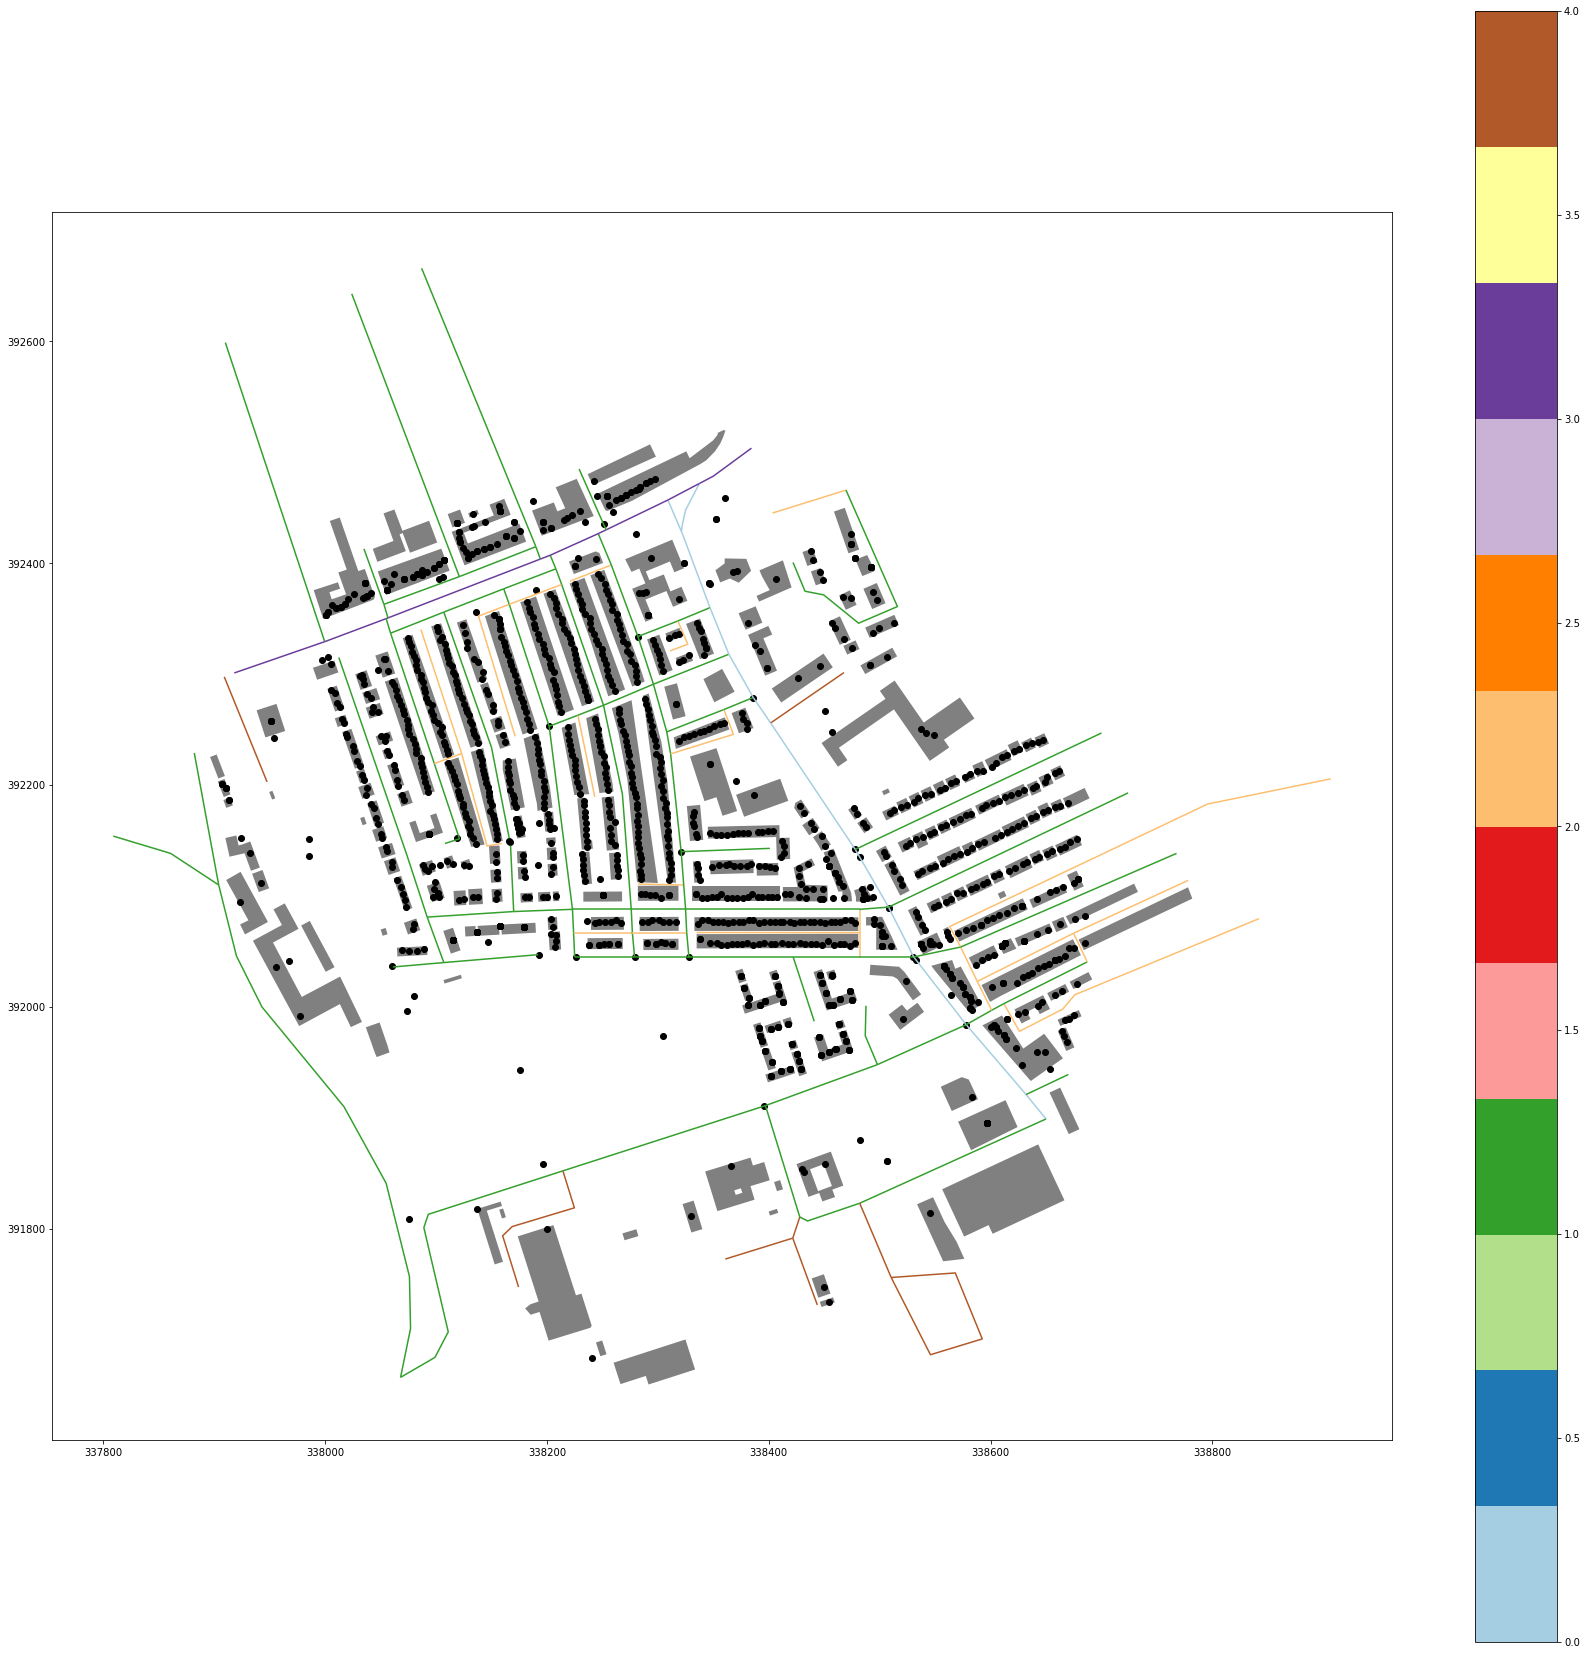

In [88]:
fig, ax = plt.subplots(figsize=(30,30))
omap.plot(ax=ax, color='grey')
uprn.plot(ax=ax, color='k')
roads.plot('color',ax=ax, cmap='Paired', legend=True)
# local.plot(ax=ax, color='gray')
# motorway.plot(ax=ax, color='k')
# aroads.plot(ax=ax, color='red')
# broads.plot(ax=ax, color='blue')

In [120]:
sql = 'SELECT * FROM openroads'

In [ ]:
sql = '''SELECT table_name
  FROM information_schema.tables
 WHERE table_schema='public'
   AND table_type='BASE TABLE';'''

roads = gpd.read_postgis(sql, engine, geom_col='geometry')

In [ ]:
len(roads)

In [59]:
pd.read_sql(sql, engine).table_name.head(50)

0    spatial_ref_sys
1          opennames
2         openrivers
3          openroads
4       boundaryline
5       openmaplocal
6     opengreenspace
Name: table_name, dtype: object

In [112]:
omap

,id,featureCode,geometry
0,idB5F3A59F-E15D-482A-BB4D-BFB2812B4427,15014,"POLYGON ((343277.220 392023.430, 343270.110 39..."
1,id4E6EC717-4C9A-4337-87CD-D911316D63ED,15014,"POLYGON ((343256.790 392030.620, 343257.360 39..."
2,id33DECE56-95E4-427D-A3F7-C21CFF46F08E,15014,"POLYGON ((343198.050 392028.580, 343210.470 39..."
3,id0EC6B43E-41A2-4F88-B63E-7451BEC3929D,15014,"POLYGON ((343278.280 392062.340, 343277.590 39..."
4,id31C4C0A3-935C-47D2-921B-8AF87FCCCB5A,15014,"POLYGON ((343244.150 392076.660, 343249.300 39..."
...,...,...,...
43136,id7C5DEC88-5890-446F-8D72-A74D7264B5EC,15014,"POLYGON ((334335.600 395073.830, 334284.170 39..."
43137,id488FAEC3-BB66-4DDD-870B-473C2BB62862,15014,"POLYGON ((334538.630 395087.110, 334537.870 39..."
43138,id43FDBA59-9150-43AC-BFD6-830D7FAF1E4F,15014,"POLYGON ((334588.960 395049.140, 334593.030 39..."
43139,id08C5C606-7B45-43B4-BA6D-CB7BB48DC365,15014,"POLYGON ((334603.440 395056.450, 334614.890 39..."


<AxesSubplot:>

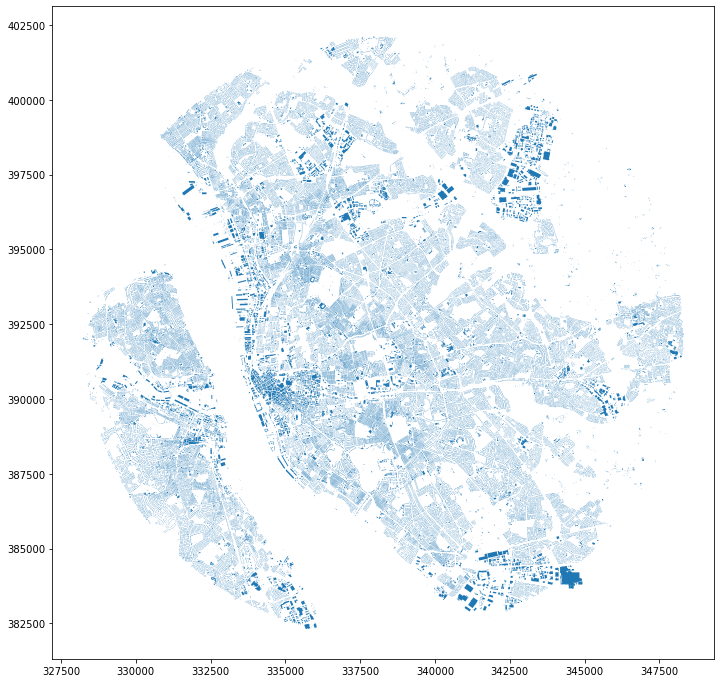

In [115]:
fig, ax = plt.subplots(figsize=(12,12))
omap.plot(ax = ax)

In [72]:
rivers.geometry.type.unique()

array(['Point'], dtype=object)

In [66]:
rivers.hydroNodeCategory.unique()

array(['source', 'inapplicable', 'junction', 'outlet'], dtype=object)

In [40]:
sql = 'SELECT * FROM boundaryline'
bds = gpd.read_postgis(sql, engine, geom_col='geometry')

<AxesSubplot:>

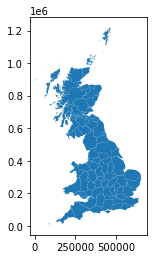

In [46]:
bds.plot()

In [49]:
rivers = gpd.read_postgis('SELECT * FROM openrivers', engine, geom_col='geometry')

In [ ]:
rivers